In [8]:
import numpy as np
import cv2 as cv
import time
import matplotlib.pyplot as plt

In [9]:
# Leemos los clasificadores pre-entrenados
#---------------------------------------------------------------------------
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier('haarcascade_eye.xml')
smile_cascade = cv.CascadeClassifier('haarcascade_smile.xml')

In [18]:
def Haar_cascade(frame):
    # Pasamos la imagen a escala de grises
    #-------------------------------------
    grayImage = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    grayImage = cv.equalizeHist(grayImage)

    # Llamamos al clasificador de Haar (AdaBoost)
    #--------------------------------------------
    faces = face_cascade.detectMultiScale(grayImage, 1.1, 5)
    
    # Recorro las caras encontradas
    #------------------------------
    for (x,y,w,h) in faces:
        # Le dibujamos un rectángulo 
        cv.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        
        # Definimos las ROIs en la imagen gris y color
        roi_gray = grayImage[y:y+h, x:x+w] 
        roi_color = frame[y:y+h, x:x+w] 
        
        # Para cada rostro hallado le buscamos los ojos
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 10)
        # En los ojos hallados les dibujamos rectángulos
        for (ex,ey,ew,eh) in eyes:
            cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
            
        # Para cada rostro hallado le buscamos la sonrisa
        smile = smile_cascade.detectMultiScale(roi_gray, 1.5, 15)
        # En la sonrisa hallados les dibujamos un rectángulo
        for (sx,sy,sw,sh) in smile:
            cv.rectangle(roi_color,(sx,sy),(sx+sw,sy+sh),(0,255,0),2)
    
    cv.imshow('frame',frame)
    return frame

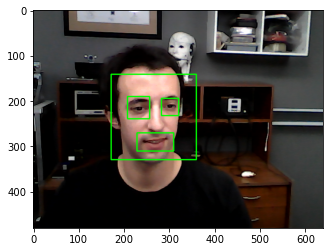

In [20]:
camera = cv.VideoCapture(0)

while(1):
    ret,frame = camera.read()
    k = cv.waitKey(60) & 0xff
    if k == 27:
        break
    frame_ = Haar_cascade(frame)

plt.figure()
plt.imshow(frame_[:,:,::-1])
cv.destroyAllWindows()
camera.release()